In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_excel('/content/gdrive/MyDrive/A1/Задания_1_2.xlsx', sheet_name='Training')
data.head()

,ID,Target,P1,P2,P3,P4,P5,P6,P7,P8,...,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31
0,283,1,0.0,NaN,NaN,10,0,1.02273,1.01608,1.55268,...,831.68333,783.81667,171.33333,818.15000,0.62772,0.13333,0.00000,6.41893,0.97122,6.41893
1,342,0,0.0,30.00000,6.80153,0,0,1.00000,1.65348,1.14852,...,195.13889,168.30000,81.00000,NaN,6.32407,0.26667,0.33333,NaN,1.60714,3.44800
2,631,0,0.0,30.00000,9.60267,0,0,1.00000,0.84143,NaN,...,226.10556,207.41667,110.00000,184.49444,2.25635,0.00000,0.06667,NaN,0.75000,8.08000
3,1165,0,0.0,30.33333,15.32553,0,0,0.98901,0.88114,NaN,...,567.53889,441.52778,194.00000,625.32222,2.74469,0.13333,0.40000,13.50400,0.98119,13.50400
4,1469,0,0.0,28.00000,7.54133,0,0,0.92857,1.21447,0.60138,...,154.80556,86.64444,71.66667,53.45000,0.91130,0.46667,0.40000,NaN,0.40171,3.44800


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      10000 non-null  int64  
 1   Target  10000 non-null  int64  
 2   P1      10000 non-null  float64
 3   P2      8492 non-null   float64
 4   P3      8523 non-null   float64
 5   P4      10000 non-null  int64  
 6   P5      10000 non-null  int64  
 7   P6      10000 non-null  float64
 8   P7      10000 non-null  float64
 9   P8      8482 non-null   float64
 10  P9      10000 non-null  float64
 11  P10     10000 non-null  float64
 12  P11     10000 non-null  float64
 13  P12     10000 non-null  float64
 14  P13     10000 non-null  float64
 15  P14     10000 non-null  float64
 16  P15     10000 non-null  float64
 17  P16     8475 non-null   float64
 18  P17     10000 non-null  float64
 19  P18     10000 non-null  float64
 20  P19     10000 non-null  float64
 21  P20     10000 non-null  float64
 22 

In [ ]:
data.describe()

,ID,Target,P1,P2,P3,P4,P5,P6,P7,P8,...,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31
count,1.000000e+04,10000.000000,10000.000000,8492.000000,8523.000000,10000.000000,10000.000000,10000.000000,10000.000000,8482.000000,...,10000.000000,10000.000000,10000.000000,8496.000000,10000.000000,10000.000000,10000.000000,8467.000000,10000.000000,10000.000000
mean,5.572251e+06,0.500000,1.032911,24.972718,14.497498,2.329800,0.079200,0.950521,0.993450,0.875107,...,254.005455,204.907409,124.197333,268.877144,1.683967,0.183617,0.179254,9.048853,0.973444,10.625063
std,4.206422e+06,0.500025,3.977033,7.537203,10.703977,5.754871,0.270064,0.217456,0.223170,0.524680,...,299.695057,263.099484,137.442492,355.736543,1.997374,0.189519,0.194499,5.529335,0.528715,6.688086
min,2.830000e+02,0.000000,0.000000,1.000000,0.723030,0.000000,0.000000,0.048390,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.811950e+06,0.000000,0.000000,22.333330,8.004265,0.000000,0.000000,0.939760,0.916913,0.592615,...,52.851392,33.952780,33.000000,47.193053,0.507607,0.000000,0.000000,4.320000,0.750000,5.096000
50%,3.583642e+06,0.500000,0.000000,28.666670,12.532000,0.000000,0.000000,0.989010,0.997990,0.883840,...,150.805555,110.519445,83.166665,146.880555,1.194580,0.133330,0.133330,9.115600,1.000000,9.536000
75%,1.010481e+07,1.000000,0.000000,30.333330,18.522270,1.000000,0.000000,1.000000,1.048620,1.129363,...,348.923610,274.991665,167.000000,346.656943,2.146517,0.266670,0.266670,9.920000,1.216220,14.456000
max,1.288771e+07,1.000000,66.666670,30.333330,287.935870,30.000000,1.000000,2.437500,2.763270,3.000000,...,3803.522220,3043.930670,1625.333330,5339.972220,26.899270,1.000000,1.000000,96.288000,7.246720,97.352000


### *WE HAVE TWO BALANCED CLASSES OF TARGET VARIABLE*

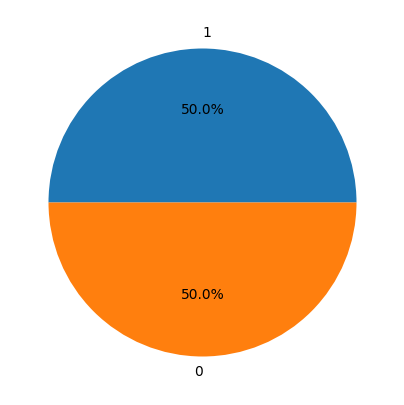

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(data['Target'].value_counts(), autopct="%1.1f%%", labels=data['Target'].value_counts().index)
plt.show()

### *AND THERE ARE SOME FEATURES WITH MISSING VALUES, THE NUMBER OF WHICH CAN BE SEEN IN THE TABLE.*

In [ ]:
coef_t = data.drop(['ID'], axis=1).corr()
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data['importance'] = coef_t['Target']
missing_data[missing_data['Total'] > 0]

,Total,Percent,importance
P29,1533,0.1533,-0.149272
P16,1525,0.1525,-0.315871
P8,1518,0.1518,-0.128493
P2,1508,0.1508,-0.286880
P25,1504,0.1504,-0.207829
P3,1477,0.1477,-0.064884


### **Data preproccesing:**
- Dealing with missing data
- Feature importance analysis
- Getting rid of useless features
- Normalizing


In [ ]:
y = data['Target']
x = data.drop(['ID', 'Target'], axis = 1)

### *From confusion matrix we find pairs features with high correlation (>0.9) and get rid of one of the pair, which are 'P5', 'P25', 'P29'.*

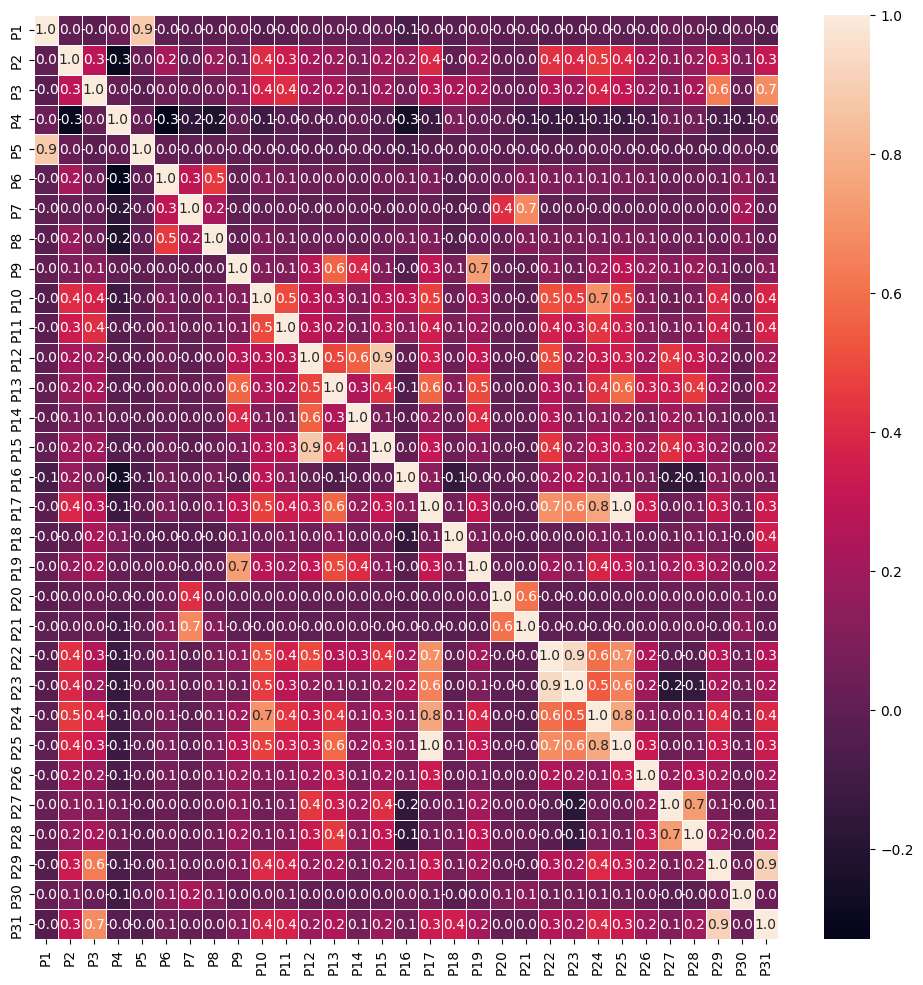

In [ ]:
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

### *Next, the function create_data() was designed to recover missing data. It does the following:*
- gets the name of the feature;
- creates a mini dataset of features with which the correlation is greater than the threshold;
- splits the mini-dataset into a test dataset (missing values) and a training dataset (the others);
- recovers missing values by predicting them with RandomForest.


In [ ]:
def create_data(data2, feature):
    from sklearn.ensemble import RandomForestRegressor
    coef_t = data2.drop(['ID', 'Target'], axis=1).corr()
    cols = abs(coef_t[feature]).sort_values(ascending=False)[0:10]
    cols = list(cols[cols>0.1].index)
    cols = list(pd.DataFrame(data2[cols].isnull().sum())[-(data2[cols].isnull().sum()>0)].index)
    x, y = data2.drop(['ID', 'Target'], axis = 1), data2['Target']
    mask = data2[feature].isna()
    print('Picked features for', feature, ':', cols)
    print('Before: N missing values =', mask.sum())
    P_y_test = data2[feature][mask]
    P_y = data2[feature][-mask]
    P_x = data2[cols][-mask]
    P_x_test = data2[cols][mask]

    RFR = RandomForestRegressor(n_estimators=200, max_features=4, max_depth=7, criterion='squared_error', random_state = 43)
    RFR.fit(P_x, P_y)
    y_pred = RFR.predict(P_x_test)
    data2[feature][mask] = y_pred
    print('After: N missing values =', data[feature].isna().sum())

    return data2

In [ ]:
data_16 = create_data(data, 'P16')

Picked features for P16 : ['P10', 'P4', 'P23', 'P22', 'P27', 'P28', 'P18', 'P11']
Before: N missing values = 1525
After: N missing values = 0


In [ ]:
data_16_2 = create_data(data_16, 'P2')

Picked features for P2 : ['P24', 'P22', 'P10', 'P23', 'P17', 'P11', 'P31']
Before: N missing values = 1508
After: N missing values = 0


In [ ]:
data_16_2 = create_data(data_16, 'P8')

Picked features for P8 : ['P6', 'P4', 'P7', 'P2', 'P21', 'P30']
Before: N missing values = 1518
After: N missing values = 0


In [ ]:
data_16_2 = create_data(data_16, 'P3')

Picked features for P3 : ['P31', 'P11', 'P24', 'P10', 'P2', 'P17', 'P22']
Before: N missing values = 1477
After: N missing values = 0


In [44]:
coef_t = data_16_2.drop(['ID'], axis=1).corr()
total = data_16_2.isnull().sum().sort_values(ascending=False)
percent = (data_16_2.isnull().sum()/data_16_2.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data['importance'] = coef_t['Target']
missing_data[missing_data['Total'] > 0].drop(index=['P29', 'P25']) # P25, P29 have high correlation with other features

,Total,Percent,importance


### *FEATURE IMPORTANCE ANALYSIS*

Determine which attributes have a correlation with a Target less than threshold using a correlation matrix and drop them from the dataset

In [ ]:
coef_t = data_16_2.drop(['ID'], axis=1).corr()

In [ ]:
abs(coef_t['Target']).sort_values(ascending=False)

Target    1.000000
P16       0.316162
P2        0.282496
P23       0.261993
P10       0.247396
P22       0.236605
P24       0.217153
P25       0.207829
P4        0.207070
P17       0.207068
P11       0.158195
P6        0.150301
P29       0.149272
P8        0.129914
P31       0.121364
P28       0.116822
P27       0.109903
P26       0.088348
P30       0.079332
P3        0.073056
P15       0.047445
P1        0.040687
P18       0.039929
P12       0.033965
P5        0.018515
P13       0.017436
P21       0.016798
P14       0.011658
P20       0.011053
P9        0.004477
P7        0.003166
P19       0.000660
Name: Target, dtype: float64

In [45]:
list_rid_off = list(abs(coef_t['Target']).sort_values(ascending=False)[(abs(coef_t['Target']).sort_values(ascending=False)<0.01)].index)
list_rid_off

['P9', 'P7', 'P19']

## *FIT MODELS*

RandomForest

25
Accuracy is:  0.692


<Axes: >

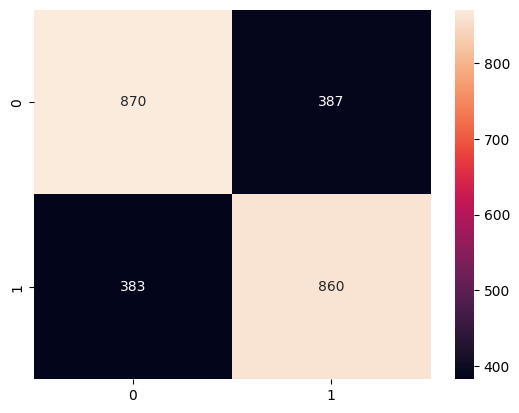

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

x, y = data_16_2.drop(['ID', 'Target', 'P5', 'P25', 'P29']+list_rid_off, axis = 1), data_16_2['Target'] #, 'P3', 'P8'   /  [selected_columns]
print(len(x.columns))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

clf_rf = RandomForestClassifier(random_state=43)
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [41]:
estimator = RandomForestClassifier()

params = {'max_depth': [10], #[5, 10, 20, 50],
              'n_estimators' : [400], #np.arange(100, 500, step=100),
              'max_features' : [5],
              'criterion' : ['entropy'], #['gini','entropy'],
              'min_samples_leaf' : [7], #[4, 7, 9],
              'min_samples_split' : [5], #[2, 5, 10, 20]
         }

searcher = GridSearchCV(estimator = estimator, param_grid=params, cv=3, scoring='roc_auc', n_jobs=-1)

%time searcher.fit(x_train, y_train)

scorer = searcher.scorer_
print(scorer)

best_params = searcher.best_params_
print(best_params)

CPU times: user 11 s, sys: 113 ms, total: 11.2 s
Wall time: 35.1 s
make_scorer(roc_auc_score, needs_threshold=True)
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 7, 'min_samples_split': 5, 'n_estimators': 400}


In [42]:
searcher.best_score_

0.763098884900029

Accuracy is: 0.7012


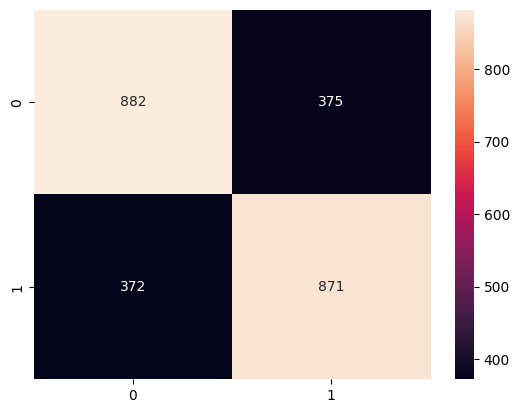

In [ ]:
# best_RF = searcher.best_estimator_
best_RF = RandomForestClassifier(n_estimators=400, criterion='entropy', max_depth=10, min_samples_split=5,
                                 min_samples_leaf=7, max_features=5)
best_RF = best_RF.fit(x_train,y_train)

acc_score = accuracy_score(y_test, best_RF.predict(x_test))
print('Accuracy is:', acc_score)
cmb = confusion_matrix(y_test,best_RF.predict(x_test))
sns.heatmap(cmb,annot=True,fmt="d")
plt.show()

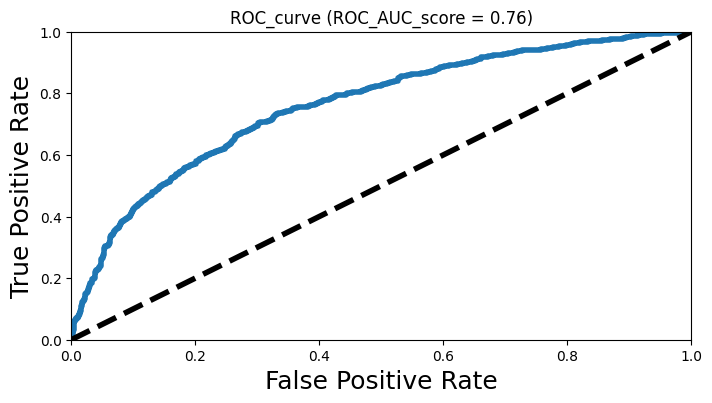

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

probs = best_RF.predict_proba(x_test)

test_auc = roc_auc_score(y_test, probs[:,1])

FPR, TPR, _ = roc_curve(y_test, probs[:,1])
ROC_AUC = roc_auc_score(y_test, probs[:,1])

plt.figure(figsize =[8,4])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC_curve (ROC_AUC_score = {})'.format(round(ROC_AUC, 4)))
plt.show()

In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test, best_RF.predict(x_test)))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70      1257
           1       0.70      0.69      0.70      1243

    accuracy                           0.70      2500
   macro avg       0.70      0.70      0.70      2500
weighted avg       0.70      0.70      0.70      2500



LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score

logreg = LogisticRegression(C=10, solver='liblinear',
                            penalty= 'l2',random_state = 42)

logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)
accuracy_score(y_test, y_pred)

0.696

In [ ]:
ROC_AUC = roc_auc_score(y_test, logreg.predict_proba(x_test)[:, 1])
ROC_AUC

0.7657020924176182

In [ ]:
from sklearn.preprocessing import StandardScaler
st_scale = StandardScaler()

x_train_scl = pd.DataFrame(st_scale.fit_transform(x_train), columns=x_train.columns)

x_test_scl = pd.DataFrame(st_scale.transform(x_test), columns=x_test.columns)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score

logreg = LogisticRegression(C=10, solver='liblinear',
                            penalty= 'l2',random_state = 42)

logreg.fit(x_train_scl,y_train)
y_pred = logreg.predict(x_test_scl)
accuracy_score(y_test, y_pred)

0.6956

In [ ]:
ROC_AUC = roc_auc_score(y_test, logreg.predict_proba(x_test_scl)[:, 1])
ROC_AUC

0.7646575796616981

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
ExtraTreesClassifier = ExtraTreesClassifier()
ExtraTreesClassifier.fit(x_train, y_train)
y_pred = ExtraTreesClassifier.predict(x_test)
extraTree_accy = round(accuracy_score(y_pred, y_test), 3)
print(extraTree_accy)

0.687


In [ ]:
ROC_AUC = roc_auc_score(y_test, ExtraTreesClassifier.predict_proba(x_test)[:, 1])
ROC_AUC

0.7508600269704458

In [ ]:
!pip install catboost

Boosting

In [ ]:
import catboost

gradient_boost = catboost.CatBoostClassifier(n_estimators=200, l2_leaf_reg=4.25,
                                                     learning_rate=0.05, max_depth=3)
gradient_boost.fit(x_train, y_train)
y_pred = gradient_boost.predict(x_test)
gradient_accy = round(accuracy_score(y_pred, y_test), 3)

In [ ]:
print(gradient_accy)

0.69


In [ ]:
ROC_AUC = roc_auc_score(y_test, gradient_boost.predict_proba(x_test)[:, 1])
ROC_AUC

0.7588225166741229

### *TEST EXECUTION*

In [ ]:
x, y = data_16_2.drop(['ID', 'Target', 'P25', 'P29']+list_rid_off, axis = 1), data_16_2['Target'] #, 'P3', 'P8'   /  [selected_columns]

In [ ]:
test = pd.read_excel('/content/gdrive/MyDrive/A1/Задания_1_2.xlsx', sheet_name='Validate')
test.head()

,ID,Target,P1,P2,P3,P4,P5,P6,P7,P8,...,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31
0,127,NaN,0.0,30.33333,8.86883,0,0,0.98901,1.01885,1.31226,...,85.59444,32.45000,41.00000,95.39444,4.64779,0.40000,0.73333,8.256,0.11725,8.256
1,214,NaN,0.0,30.33333,12.82570,0,0,0.98901,0.96587,0.94475,...,809.37778,787.77778,164.66667,239.95000,2.34907,0.00000,0.00000,4.320,1.33333,10.000
2,542,NaN,0.0,9.00000,5.25643,0,0,0.88889,0.97863,1.68000,...,26.34444,25.89444,1.33333,1.26667,0.43333,0.13333,0.06667,5.096,1.16688,5.096
3,674,NaN,0.0,24.33333,NaN,0,0,0.90411,0.88409,0.58490,...,116.31111,73.20000,27.33333,34.62222,0.69722,0.33333,0.13333,4.712,1.80000,4.712
4,756,NaN,0.0,30.33333,21.90167,0,0,0.98901,1.02636,1.30082,...,275.16111,201.13889,285.00000,369.42778,1.36109,0.13333,0.13333,21.096,0.00000,21.096


In [ ]:
coef_t_test = test.drop(['ID'], axis=1).corr()
total_test = test.isnull().sum().sort_values(ascending=False)
percent_test = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data_test = pd.concat([total_test, percent_test], axis=1, keys=['Total', 'Percent'])
missing_data_test['importance'] = coef_t_test['Target']
missing_data_test[missing_data_test['Total'] > 0]

,Total,Percent,importance
Target,20000,1.00000,NaN
P25,3021,0.15105,NaN
P8,3015,0.15075,NaN
P29,3013,0.15065,NaN
P16,3003,0.15015,NaN
P3,2979,0.14895,NaN
P2,2968,0.14840,NaN


In [ ]:
test_filled = create_data(test, 'P16')

Picked features for P16 : ['P4', 'P10', 'P23', 'P22', 'P27']
Before: N missing values = 3003
After: N missing values = 0


In [ ]:
test_filled = create_data(test_filled, 'P2')

Picked features for P2 : ['P24', 'P22', 'P23', 'P10', 'P17', 'P31', 'P11']
Before: N missing values = 2968
After: N missing values = 0


In [ ]:
test_filled = create_data(test_filled, 'P8')

Picked features for P8 : ['P6', 'P7', 'P4']
Before: N missing values = 3015
After: N missing values = 0


In [ ]:
test_filled = create_data(test_filled, 'P3')

Picked features for P3 : ['P31', 'P11', 'P24', 'P10', 'P13', 'P17', 'P18']
Before: N missing values = 2979
After: N missing values = 0


In [ ]:
x_test = test_filled.drop(['ID', 'Target', 'P5', 'P25', 'P29']+list_rid_off, axis = 1)

In [ ]:
x_train, y_train = data_16_2.drop(['ID', 'Target', 'P5', 'P25', 'P29']+list_rid_off, axis = 1), data_16_2['Target']

In [ ]:
best_RF = RandomForestClassifier(n_estimators=400, criterion='entropy', max_depth=10, min_samples_split=5,
                                 min_samples_leaf=7, max_features=5)

best_RF = best_RF.fit(x_train,y_train)

final_preds = best_RF.predict(x_test)

In [ ]:
importances = pd.Series(best_RF.feature_importances_,
                         x_train.columns).sort_values(ascending=False)

In [ ]:
round(importances, 3)[:3]

P16    0.143
P23    0.094
P10    0.075
dtype: float64

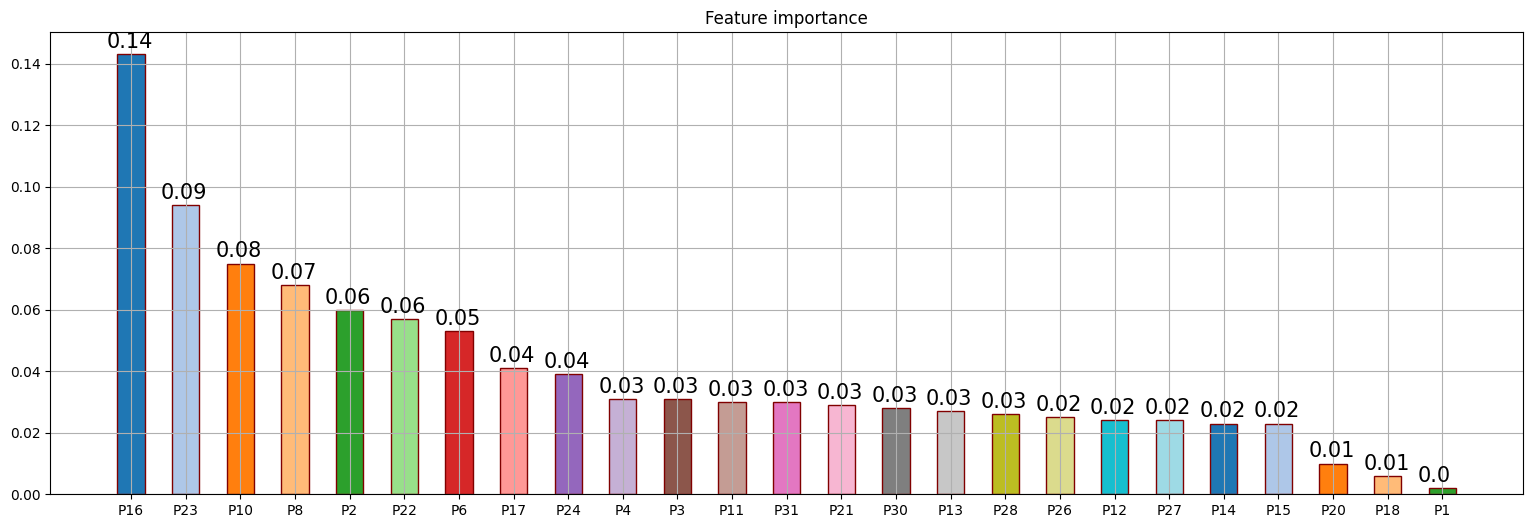

In [ ]:
plt.figure(figsize=[19, 6])

col_map = plt.get_cmap('tab20')

pl = plt.bar(importances.index, round(importances, 3), width=0.5, color=col_map.colors,
        edgecolor='maroon', linewidth=1)

for bar in pl:
    plt.annotate(round(bar.get_height(), 2),
                 xy=(bar.get_x()-0.2, np.maximum(bar.get_height()+0.002, 0)),
                     fontsize=15)
plt.title('Feature importance')
plt.grid()

In [ ]:
results = test_filled.Target

In [ ]:
results.Target = final_preds

In [ ]:
results = pd.DataFrame(final_preds, columns=['Target'])

In [ ]:
results.to_csv('results_2.csv', index=False)